In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.colors as col
import matplotlib.cm as cm
import seaborn as sns
import re

%matplotlib notebook

plt.style.use('seaborn-colorblind')

In [2]:

dict_datasets={
    "Tigers":"List of Detroit Tigers seasons - Wikipedia.html",
    "Lions":"List of Detroit Lions seasons - Wikipedia.html",
    "Pistons":"List of Detroit Pistons seasons - Wikipedia.html",
    "RedWings":"List of Detroit Red Wings seasons - Wikipedia.html",
}

# Lions
df_lions=pd.read_html(dict_datasets["Lions"])[1][6:92]

lions=pd.DataFrame()
lions['Year']=df_lions['Season']['Season']
lions['Wins']=df_lions['Regular season']['W'].astype(int)
lions['Losses']=df_lions['Regular season']['L'].astype(int)

lions['Win %_Lions']=lions['Wins']/(lions['Wins']+lions['Losses'])

# Tigers
df_tigers=pd.read_html(dict_datasets['Tigers'])[3]

tigers=pd.DataFrame()
tigers[['Year','Wins','Losses']]=df_tigers[['Season','Wins','Losses']].copy()
tigers['Year']=tigers['Year'].astype(str)
tigers['Year']=tigers['Year'].astype(object)
tigers['Wins']=tigers['Wins'].astype(int)
tigers['Losses']=tigers['Losses'].astype(int)
tigers['Win %_Tigers']=tigers['Wins']/(tigers['Wins']+tigers['Losses'])

# Pistons
df_pistons=pd.read_html(dict_datasets['Pistons'])[1][11:74]

pistons=pd.DataFrame()
pistons['Year']=df_pistons['Team'].str[:4]
pistons[['Wins','Losses']]=df_pistons[['Wins','Losses']]
pistons['Wins']=pistons['Wins'].astype(int)
pistons['Losses']=pistons['Losses'].astype(int)

pistons['Win %_Pistons']=pistons['Wins']/(pistons['Wins']+pistons['Losses'])

# Red Wings
df_redw=pd.read_html(dict_datasets['RedWings'])[2][:94]

redw=pd.DataFrame()
redw['Year']=df_redw['NHL season']['NHL season'].str[:4]
redw[['Wins','Losses']]=df_redw['Regular season[3][6][7][8]'][['W','L']]
redw=redw.set_index('Year')

# missing 2004
redw.loc['2004',['Wins','Losses']]=redw.loc['2003'][['Wins','Losses']]

redw['Wins']=redw['Wins'].astype(int)
redw['Losses']=redw['Losses'].astype(int)

redw['Win %_RedWings']=redw['Wins']/(redw['Wins']+redw['Losses'])
redw=redw.reset_index()

# Merge data for visualize
Big4_Michigan=pd.merge(lions.drop(['Wins','Losses'], axis=1),tigers.drop(['Wins','Losses'], axis=1),on='Year')
Big4_Michigan=pd.merge(Big4_Michigan,pistons.drop(['Wins','Losses'], axis=1),on='Year')
Big4_Michigan=pd.merge(Big4_Michigan,redw.drop(['Wins','Losses'], axis=1),on='Year')





<IPython.core.display.Javascript object>


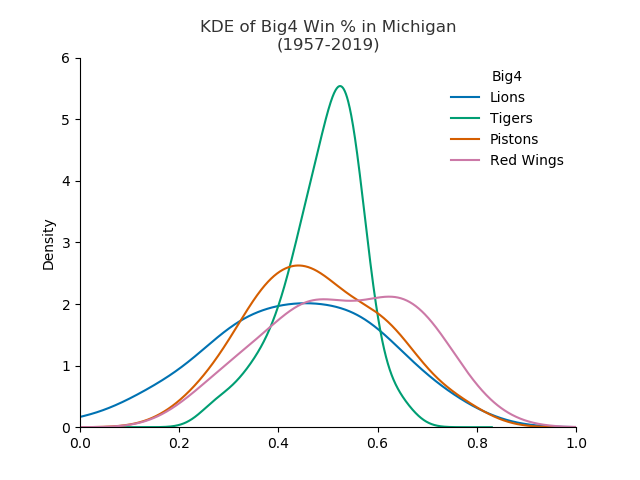

In [3]:
%matplotlib notebook
# Draw KDE
kde=Big4_Michigan.plot.kde()
[kde.spines[loc].set_visible(False) for loc in ['top', 'right']]
kde.axis([0,1,0,6])
kde.set_title('KDE of Big4 Win % in Michigan\n(1957-2019)',alpha=0.8)
kde.legend(['Lions','Tigers','Pistons','Red Wings'],loc = 'best',frameon=False, title='Big4', fontsize=10)

<IPython.core.display.Javascript object>


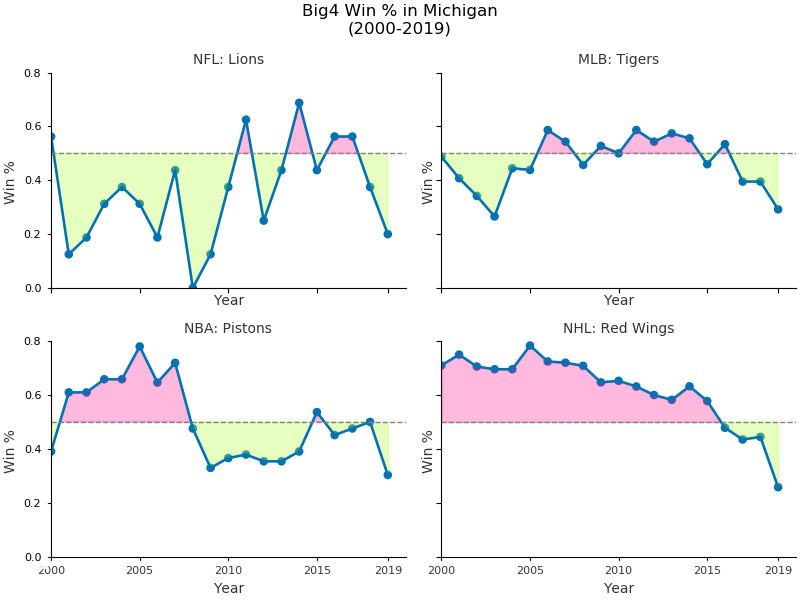

In [4]:
Big4_Michigan_0019=Big4_Michigan[40:]
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=True, sharey=True,constrained_layout=True,figsize=(8,6))
axs=[ax1,ax2,ax3,ax4]

fig.suptitle('Big4 Win % in Michigan\n(2000-2019)',alpha=1);

# Properties
columns_w=['Win %_Lions','Win %_Tigers','Win %_Pistons','Win %_RedWings']
colors=['g','b','y','r']
titles=['NFL: Lions','MLB: Tigers','NBA: Pistons','NHL: Red Wings']
axis=[0,20,0,0.8]

y=0.5

for i in range(len(axs)):
    
    # Draw the subplot
    ax=axs[i]
    # ax.plot(Big4_Michigan_0019['Year'],Big4_Michigan_0019[columns_w[i]],c=colors[i], alpha=0.5)
    #sns.lineplot(x=Big4_Michigan_0019['Year'],y=Big4_Michigan_0019[columns_w[i]], alpha=0.5,ax=ax)
    sns.pointplot(x=Big4_Michigan_0019['Year'],y=Big4_Michigan_0019[columns_w[i]],scale = 0.7, alpha=0.5,ax=ax)
    ax.axhline(y=0.5, color='gray', linewidth=1, linestyle='--')
    ax.fill_between(range(0,20), 0.5, Big4_Michigan_0019[columns_w[i]],where=(Big4_Michigan_0019[columns_w[i]]<y), color='greenyellow',interpolate=True, alpha=0.3)
    ax.fill_between(range(0,20), 0.5, Big4_Michigan_0019[columns_w[i]],where=(Big4_Michigan_0019[columns_w[i]]>y), color='deeppink',interpolate=True, alpha=0.3)
    
    # Beautify the plot
    [ax.spines[loc].set_visible(False) for loc in ['top', 'right']] # Turn off some plot rectangle spines
    ax.set_ylabel('Win % ', alpha=0.8)
    ax.set_xlabel('Year', alpha=0.8)
    ax.set_title(titles[i], fontsize=10, alpha=0.8)
    ax.axis(axis)
    ax.set_xticks(np.append(np.arange(0, 20, 5),19)) 
    ax.set_xticklabels(['2000','2005','2010','2015','2019'], fontsize=8, alpha=0.8)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(8)
        label.set_bbox(dict(facecolor='white',edgecolor='white',  alpha=0.8))
    fig.savefig('Big4_Win%_Michigan')